In [ ]:
import ROOT
import copy
import time
import numpy as np

In [ ]:
def prepare_hist(hist, draw_options):
    line_color = draw_options.get('line_color', ROOT.kBlack)
    line_thickness = draw_options.get('line_thickness', 1)
    line_style = draw_options.get('line_style', 1)
    marker_color = draw_options.get('marker_color', line_color)
    marker_style = draw_options.get('marker_style', 1)

    hist.SetLineColor(line_color)
    hist.SetLineWidth(line_thickness)
    hist.SetLineStyle(line_style)
    hist.SetMarkerColor(marker_color)
    hist.SetMarkerStyle(marker_style)
    
    hist.GetXaxis().SetTitleSize(0.05)
    
def draw_histogram(draw_statement, xmin, xmax, xbins, draw_options, x_label="", y_label="", cut="", Nmax=50000):
    hist_name = str(int(time.time() * 1e6))
    y_label="arb. units"
    hist = ROOT.TH1F(hist_name, f";{x_label};{y_label}", xbins, xmin, xmax)
    prepare_hist(hist, draw_options)
    t.Draw(f"{draw_statement}>>{hist_name}", cut, "goff", Nmax)
    return copy.deepcopy(hist)


def gen_canvas(draw_statement, xmin, xmax, xbins, x_label="", y_label="", Nmax=5000000000, log_y=False):
    

    
    ROOT.gStyle.SetOptStat(0)
    Nmax = int(Nmax)
    c = ROOT.TCanvas(f"c{time.time()}", "c", 800, 800)
    ROOT.gPad.SetLeftMargin(0.12)
    ROOT.gPad.SetRightMargin(0.12)
    ROOT.gPad.SetTopMargin(0.12)
    ROOT.gPad.SetBottomMargin(0.12)
    ROOT.gPad.SetLogy(log_y)


    pid_1, pid_2 = pion_pair
    cut_mc_true = f"MCmatch&&truepid_1=={pid_1}&&trueparentpid_2=={pid_2}&&(BG!=0)"
    cut_sweight_true = f"(MCmatch==1&&(BG!=0))*Signal"
    cut_mc_false = f"MCmatch&&!(truepid_1=={pid_1}&&trueparentpid_2=={pid_2})&&(BG!=0)"
    cut_sweight_false = f"(MCmatch==1&&(BG!=0))*BG"

    #h_all = draw_histogram(draw_statement, xmin, xmax, xbins, draw_options_library["all"], x_label, y_label, "MCmatch&&(BG!=0)", Nmax)
    h_mc_true = draw_histogram(draw_statement, xmin, xmax, xbins, draw_options_library["true"], x_label, y_label, cut_mc_true, Nmax)
    h_sweight_true = draw_histogram(draw_statement, xmin, xmax, xbins, draw_options_library["true"], x_label, y_label, cut_sweight_true, Nmax)
    h_mc_false = draw_histogram(draw_statement, xmin, xmax, xbins, draw_options_library["false"], x_label, y_label, cut_mc_false, Nmax)
    h_sweight_false = draw_histogram(draw_statement, xmin, xmax, xbins, draw_options_library["false"], x_label, y_label, cut_sweight_false, Nmax)

    #h_all.Draw("hist")
    #h_all.GetYaxis().SetLabelSize(0)
    #h_all.GetYaxis().SetRangeUser((0.1 if log_y else 0), (2.2 if log_y else 1.08)*h_all.GetMaximum())
    #h_mc_true.Draw("hist same")
    h_mc_true.Draw("hist")
    h_mc_true.GetYaxis().SetRangeUser((0.1 if log_y else 0), (2.2 if log_y else 1.2)*h_mc_true.GetMaximum())
    h_mc_true.GetYaxis().SetLabelSize(0)
    h_sweight_true.Draw("P same")
    h_mc_false.Draw("hist same")
    h_sweight_false.Draw("P same")

    legend = ROOT.TLegend(0.12, 0.88, 0.88, 0.95)
    legend.SetNColumns(2)
    # Create the histograms with double line width
    h_mc_true_double = h_mc_true.Clone()
    h_mc_true_double.SetLineWidth(2 * h_mc_true.GetLineWidth())

    h_mc_false_double = h_mc_false.Clone()
    h_mc_false_double.SetLineWidth(2 * h_mc_false.GetLineWidth())

    # Add entries to the legend
    legend.AddEntry(h_mc_true_double, "Monte Carlo Signal", "l")
    legend.AddEntry(h_sweight_true, "#it{sWeight} Signal", "EP")
    legend.AddEntry(h_mc_false_double, "Monte Carlo Bkg", "l")
    legend.AddEntry(h_sweight_false, "#it{sWeight} Bkg", "EP")

    #legend.AddEntry(h_all, "All", "l")
    legend.SetFillColor(18)
    legend.Draw()
        
    # Add "Dihadron" text in the top-left corner using LaTeX syntax
#     text = ROOT.TLatex()
#     text.SetTextFont(42)
#     text.SetTextSize(0.035)
#     _version = version
#     _version = _version.replace("Fall2018_RGA_inbending","inb. f18 rg-a").replace("Fall2018_RGA_outbending","outb. f18 rg-a").replace("Spring2019_RGA_inbending","inb. sp19 rg-a").replace("MC_RGA_inbending","inb. MC rg-a").replace("MC_RGA_outbending","outb. MC rg-a")
#     _version = _version.replace("Spring2020_RGB_inbending","inb. sp20 rg-b").replace("Fall2019_RGB_outbending","outb. f19 rg-b").replace("Spring2019_RGB_inbending","inb. sp19 rg-b").replace("MC_RGB_inbending","inb. MC rg-b").replace("MC_RGB_outbending","outb. MC rg-b")
#     _dihadron_str = dihadron_str
#     _dihadron_str = _dihadron_str.replace("piplus", "#pi^{+}").replace("piminus", "#pi^{-}").replace("pi0", "#pi^{0}").replace("_", "")
#     text.DrawLatexNDC(0.2, 0.78, f"{_dihadron_str} {_version}")
    text = ROOT.TPaveText(0.56, 0.77, 0.835, 0.83, "NDC")
    text.SetTextFont(42)
    text.SetTextSize(0.035)
    #text.SetBorderSize(0)
    #text.SetFillColor(0)
    _version = version
    _version = _version.replace("Fall2018_RGA_inbending","inb. f18 rg-a").replace("Fall2018_RGA_outbending","outb. f18 rg-a").replace("Spring2019_RGA_inbending","inb. sp19 rg-a").replace("MC_RGA_inbending","inb. MC rg-a").replace("MC_RGA_outbending","outb. MC rg-a")
    _version = _version.replace("Spring2020_RGB_inbending","inb. sp20 rg-b").replace("Fall2019_RGB_outbending","outb. f19 rg-b").replace("Spring2019_RGB_inbending","inb. sp19 rg-b").replace("MC_RGB_inbending","inb. MC rg-b").replace("MC_RGB_outbending","outb. MC rg-b")
    _dihadron_str = dihadron_str
    _dihadron_str = _dihadron_str.replace("piplus", "#pi^{+}").replace("piminus", "#pi^{-}").replace("pi0", "#pi^{0}").replace("_", "")
    text.AddText(f"{_dihadron_str} {_version}")
    text.Draw()
    c.Draw()
    return copy.deepcopy(c)





# Define a library of draw options
draw_options_library = {
    "all": {
        "line_color": ROOT.kBlack,
        "line_thickness": 2,
        "line_style": 1,
        "marker_color": ROOT.kBlack,
        "marker_style": 20
    },
    "true": {
        "line_color": ROOT.kBlue,
        "line_thickness": 2,
        "line_style": 1,
        "marker_color": ROOT.kBlue,
        "marker_style": 20
    },
    "false": {
        "line_color": ROOT.kOrange,
        "line_thickness": 2,
        "line_style": 1,
        "marker_color": ROOT.kOrange,
        "marker_style": 20
    }
}

In [ ]:
pion_pair=[211,111]
version="MC_RGA_inbending"

pid_str_1 = str(pion_pair[0]).replace("-211","piminus").replace("211","piplus").replace("111","pi0")
pid_str_2 = str(pion_pair[1]).replace("-211","piminus").replace("211","piplus").replace("111","pi0")

dihadron_str = f"{pid_str_1}_{pid_str_2}"
infile = f"/volatile/clas12/users/gmat/clas12analysis.sidis.data/clas12_dihadrons/projects/pipi0_paper_RGA_only/asym/{version}/precut/{dihadron_str}/x/AZI/outsPlotBins/DataWeightedTree.root"
tfile = ROOT.TFile(infile)
t=tfile.Get("dihadron_cuts")

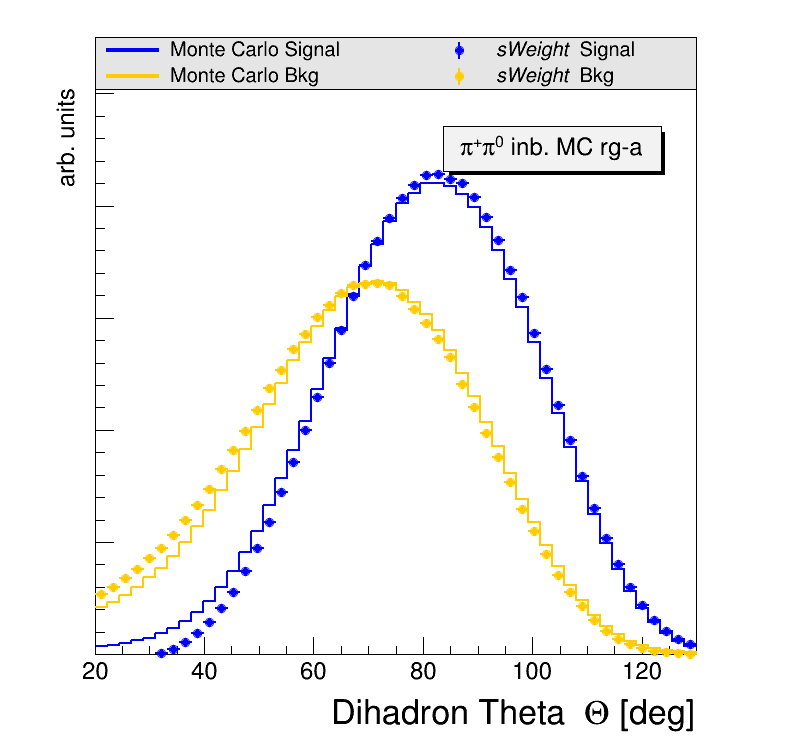

In [7]:
c=gen_canvas(draw_statement="th*180/3.14159265",
             xmin=20,
             xmax=130,
             xbins=50,
             x_label="Dihadron Theta #Theta [deg]",
             y_label="Counts")
c.Draw()

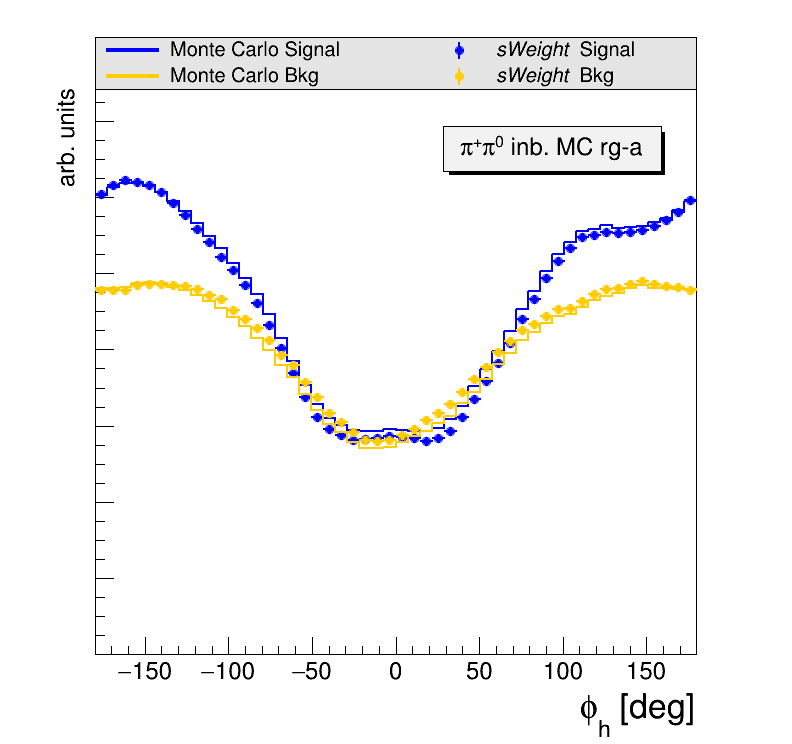

In [8]:
c_phi_h=gen_canvas(draw_statement="phi_h*180/3.14159265",
             xmin=-180,
             xmax=180,
             xbins=50,
             x_label="#phi_{h} [deg]",
             y_label="Counts")
c_phi_h.Draw()

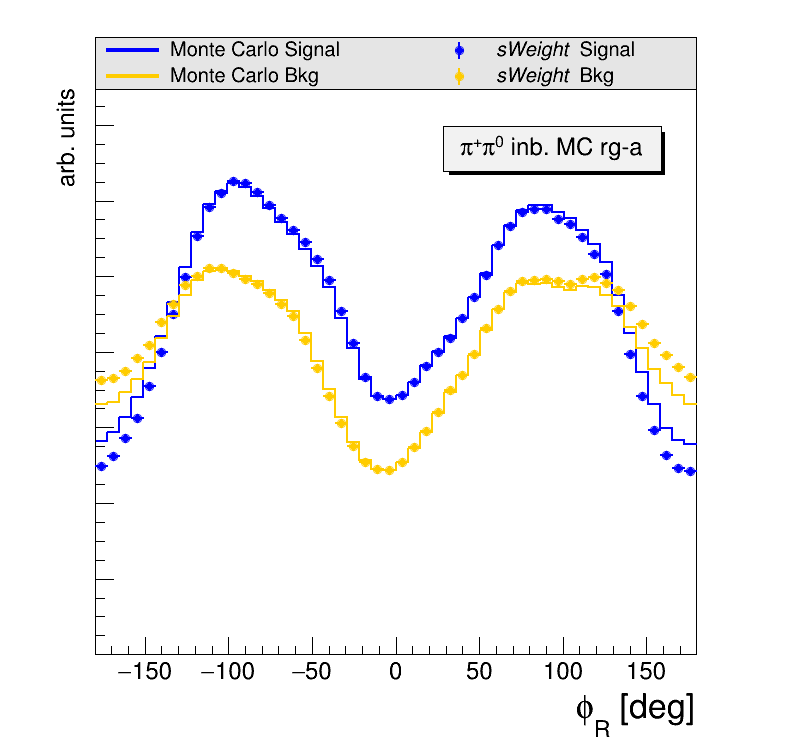

In [9]:
c_phi_R=gen_canvas(draw_statement="phi_R0*180/3.14159265",
             xmin=-180,
             xmax=180,
             xbins=50,
             x_label="#phi_{R} [deg]",
             y_label="Counts")
c_phi_R.Draw()

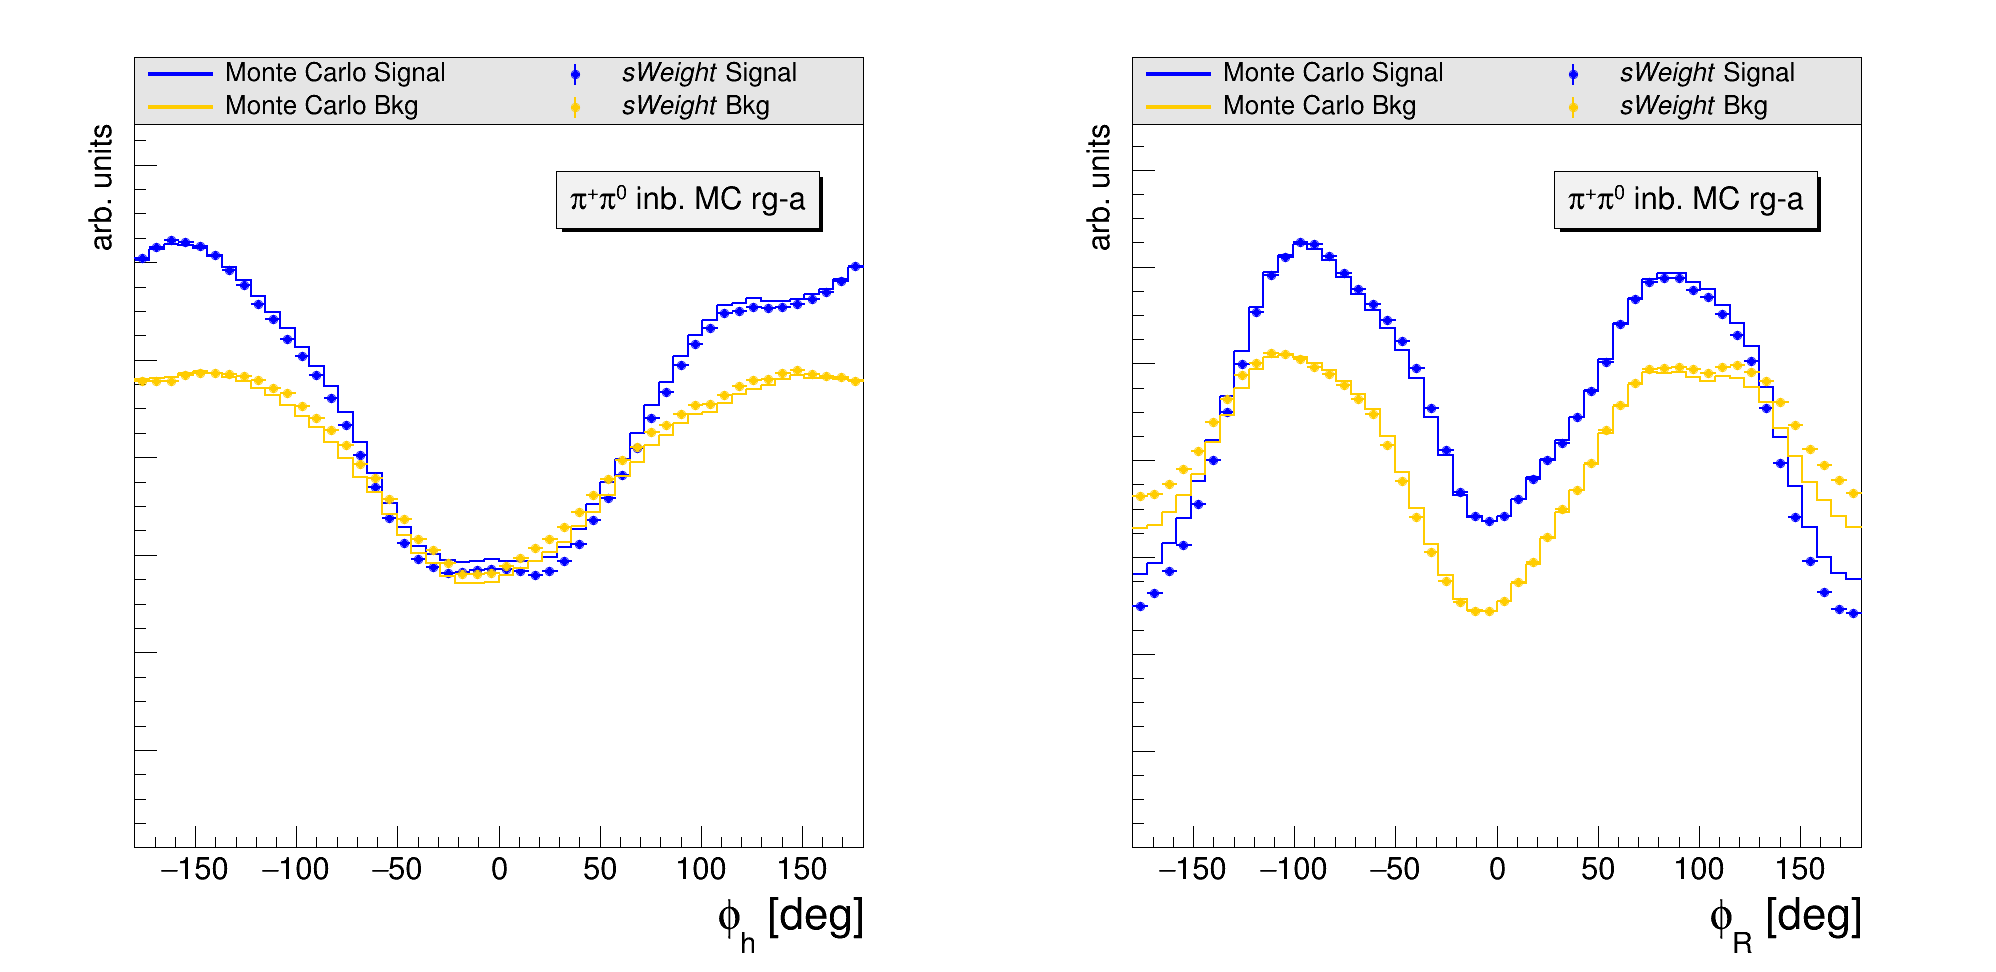

In [10]:
canvas=ROOT.TCanvas("canvas","canvas",2000,1000)
canvas.Divide(2,1)
canvas.cd(1)
c_phi_h.DrawClonePad()
canvas.cd(2)
c_phi_R.DrawClonePad()
canvas.Draw()

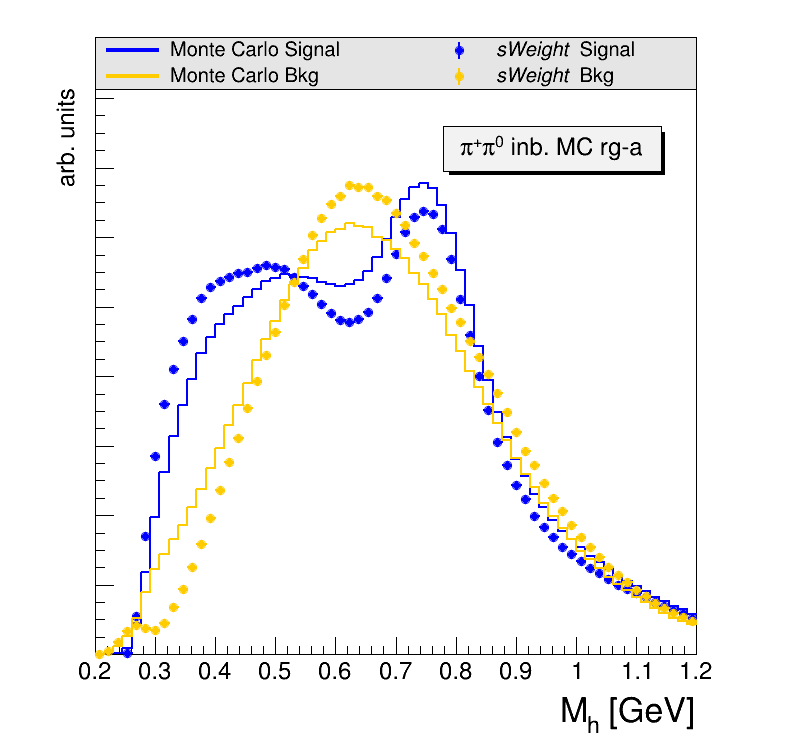

In [11]:
c=gen_canvas(draw_statement="Mh",
             xmin=0.2,
             xmax=1.2,
             xbins=65,
             x_label="M_{h} [GeV]",
             y_label="Counts")
c.Draw()

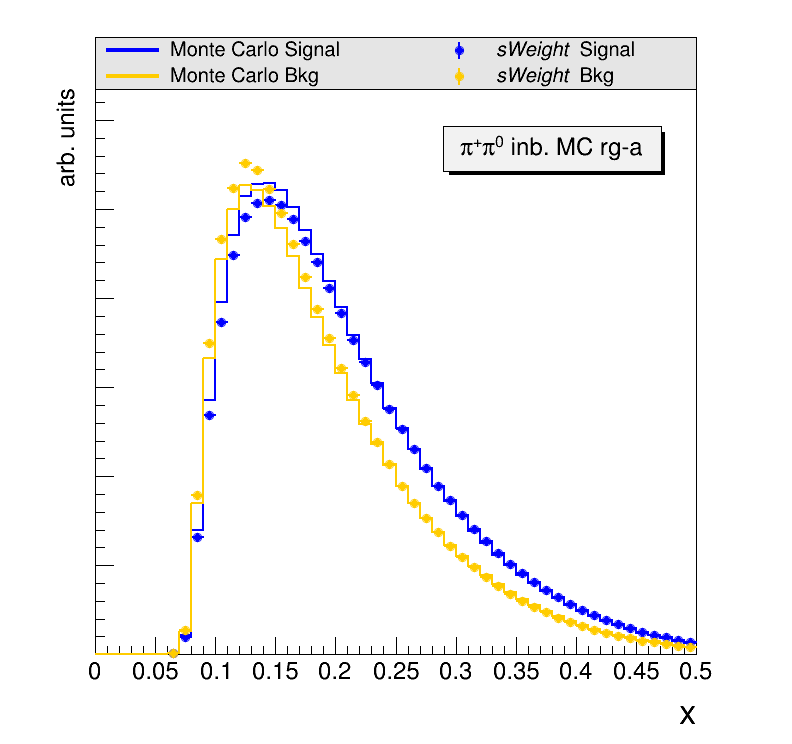

In [12]:
c=gen_canvas(draw_statement="x",
             xmin=0,
             xmax=0.5,
             xbins=50,
             x_label="x",
             y_label="Counts")
c.Draw()

Error in <TTreeFormula::Compile>:  Bad numerical expression : "BG"
Info in <TSelectorDraw::AbortProcess>: Variable compilation failed: {Q2,MCmatch&&truepid_1==211&&trueparentpid_2==111&&(BG!=0)}
Error in <TTreeFormula::Compile>:  Bad numerical expression : "BG"
Info in <TSelectorDraw::AbortProcess>: Variable compilation failed: {Q2,(MCmatch==1&&(BG!=0))*Signal}
Error in <TTreeFormula::Compile>:  Bad numerical expression : "BG"
Info in <TSelectorDraw::AbortProcess>: Variable compilation failed: {Q2,MCmatch&&!(truepid_1==211&&trueparentpid_2==111)&&(BG!=0)}
Error in <TTreeFormula::Compile>:  Bad numerical expression : "BG"
Info in <TSelectorDraw::AbortProcess>: Variable compilation failed: {Q2,(MCmatch==1&&(BG!=0))*BG}


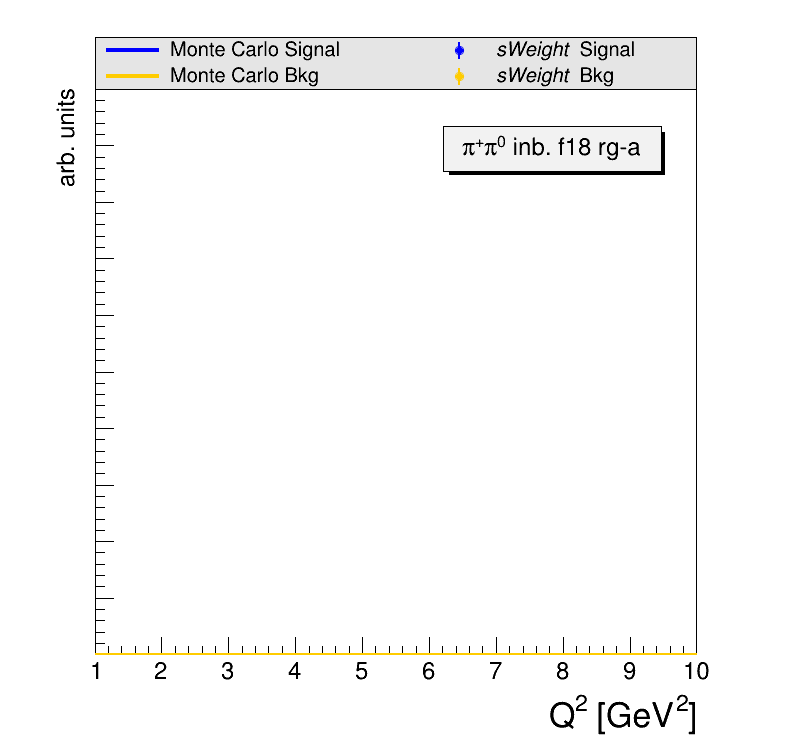

In [21]:
c=gen_canvas(draw_statement="Q2",
             xmin=1,
             xmax=10,
             xbins=50,
             x_label="Q^{2} [GeV^{2}]",
             y_label="Counts")
c.Draw()

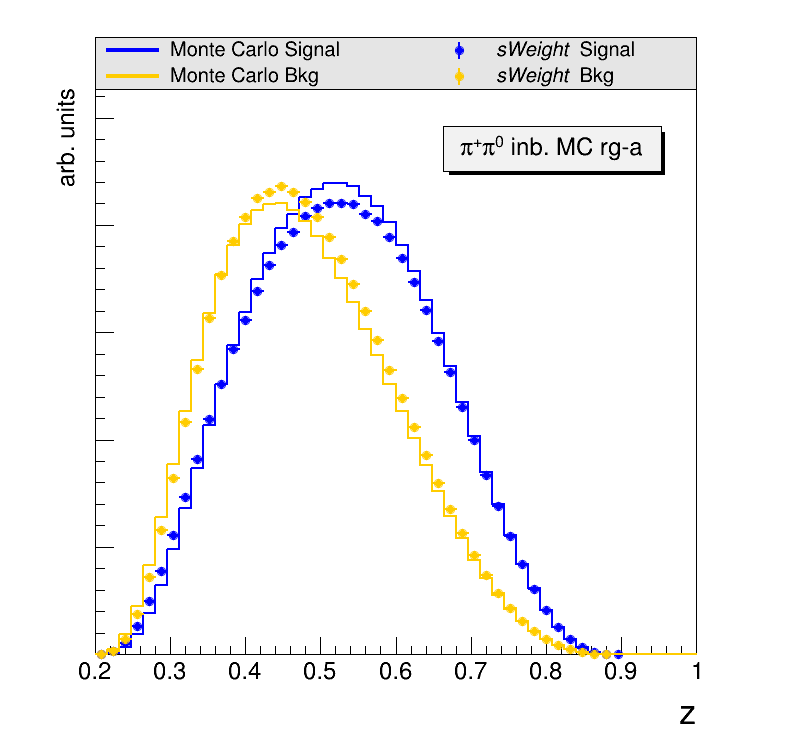

In [14]:
c=gen_canvas(draw_statement="z",
             xmin=0.2,
             xmax=1,
             xbins=50,
             x_label="z",
             y_label="Counts")
c.Draw()

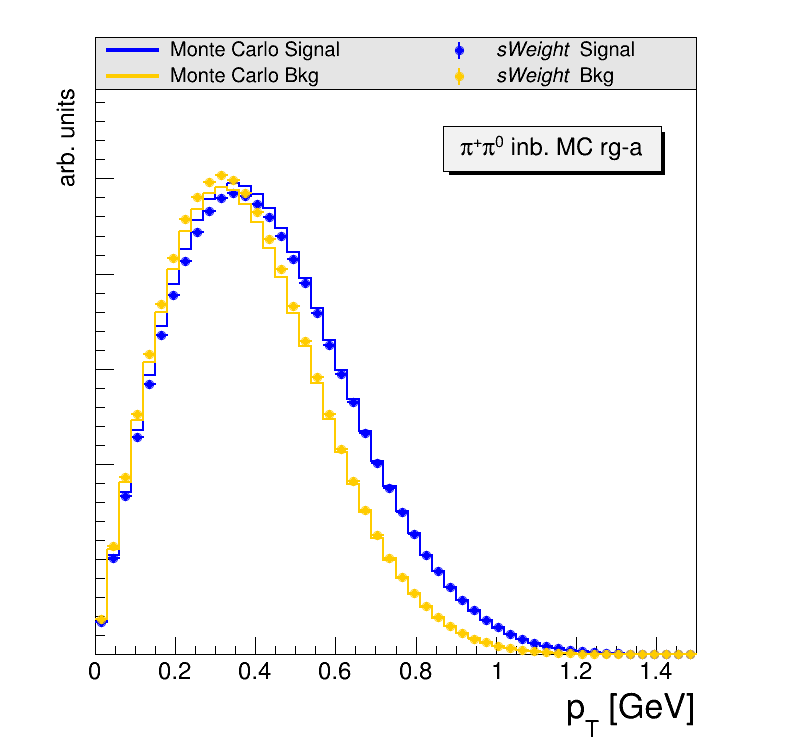

In [15]:
c=gen_canvas(draw_statement="pTtot",
             xmin=0,
             xmax=1.5,
             xbins=50,
             x_label="p_{T} [GeV]",
             y_label="Counts")
c.Draw()

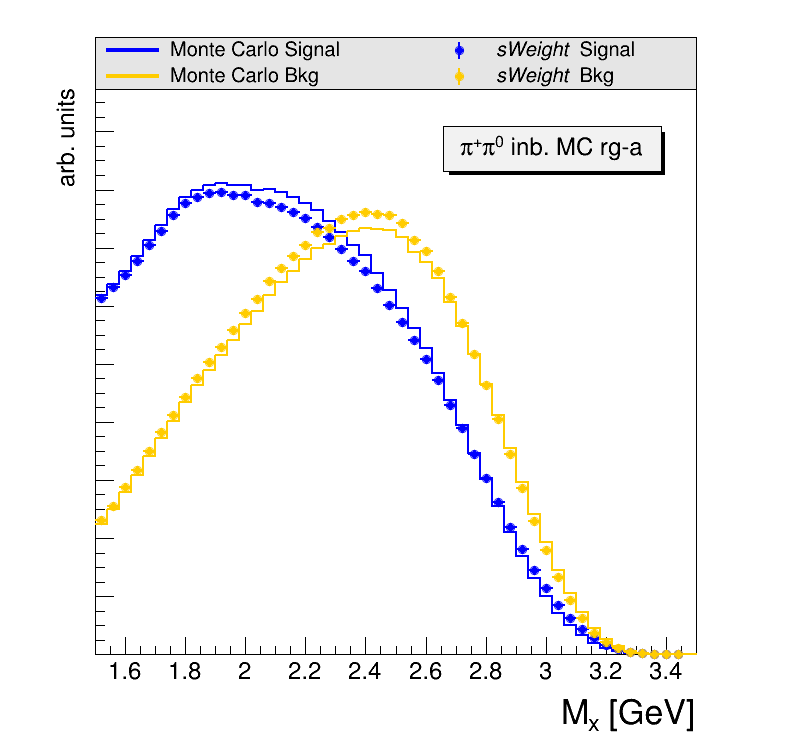

In [16]:
c=gen_canvas(draw_statement="Mx",
             xmin=1.5,
             xmax=3.5,
             xbins=50,
             x_label="M_{x} [GeV]",
             y_label="Counts")
c.Draw()

# Here is where I can compare data and Monte Carlo

In [17]:
def draw_histogram_data(draw_statement, xmin, xmax, xbins, draw_options, x_label="", y_label="", cut="", Nmax=50000):
    hist_name = str(int(time.time() * 1e6))
    y_label="arb. units"
    hist = ROOT.TH1F(hist_name, f";{x_label};{y_label}", xbins, xmin, xmax)
    prepare_hist(hist, draw_options)
    tdata.Draw(f"{draw_statement}>>{hist_name}", cut, "goff", Nmax)
    return copy.deepcopy(hist)


def gen_canvas_w_data(draw_statement, xmin, xmax, xbins, x_label="", y_label="", Nmax=500000, log_y=False):
    
    
    ROOT.gStyle.SetOptStat(0)
    Nmax = int(Nmax)
    c = ROOT.TCanvas(f"c{time.time()}", "c", 800, 800)
    ROOT.gPad.SetLeftMargin(0.12)
    ROOT.gPad.SetRightMargin(0.12)
    ROOT.gPad.SetTopMargin(0.12)
    ROOT.gPad.SetBottomMargin(0.12)
    ROOT.gPad.SetLogy(log_y)


    pid_1, pid_2 = pion_pair
    #cut_mc_true = f"truepid_1=={pid_1}&&trueparentpid_2=={pid_2}"
    cut_mc_true = f"trueparentpid_2=={pid_2}"
    cut_sweight_true = f"Signal"
    #cut_mc_false = f"!(truepid_1=={pid_1}&&trueparentpid_2=={pid_2})"
    cut_mc_false = f"trueparentpid_2!={pid_2}"
    cut_sweight_false = f"BG"
#     cut_mc_true = f"trueparentpid_2=={pid_2}&&z>0.35&&z<0.43"
#     cut_sweight_true = f"Signal*(z>0.35&&z<0.43)"
#     #cut_mc_false = f"!(truepid_1=={pid_1}&&trueparentpid_2=={pid_2})"
#     cut_mc_false = f"trueparentpid_2!={pid_2}&&z>0.35&&z<0.43"
#     cut_sweight_false = f"BG*(z>0.35&&z<0.43)"
    #h_all = draw_histogram(draw_statement, xmin, xmax, xbins, draw_options_library["all"], x_label, y_label, "MCmatch&&(BG!=0)", Nmax)
    h_mc_true = draw_histogram(draw_statement, xmin, xmax, xbins, draw_options_library["true"], x_label, y_label, cut_mc_true, Nmax)
    h_sweight_true = draw_histogram_data(draw_statement, xmin, xmax, xbins, draw_options_library["true"], x_label, y_label, cut_sweight_true, Nmax)
    h_mc_false = draw_histogram(draw_statement, xmin, xmax, xbins, draw_options_library["false"], x_label, y_label, cut_mc_false, Nmax)
    h_sweight_false = draw_histogram_data(draw_statement, xmin, xmax, xbins, draw_options_library["false"], x_label, y_label, cut_sweight_false, Nmax)

    h_mc_true.Draw("hist")
    h_mc_true.GetYaxis().SetRangeUser((0.1 if log_y else 0), (2.2 if log_y else 1.2)*h_mc_true.GetMaximum())
    h_mc_true.GetYaxis().SetLabelSize(0)
    h_sweight_true.Draw("P same")
    h_mc_false.Draw("hist same")
    h_sweight_false.Draw("P same")

    h_sweight_true.Scale(h_mc_true.Integral()/h_sweight_true.Integral())
    h_sweight_false.Scale(h_mc_false.Integral()/h_sweight_false.Integral())

    legend = ROOT.TLegend(0.12, 0.88, 0.88, 0.95)
    legend.SetNColumns(2)
    # Create the histograms with double line width
    h_mc_true_double = h_mc_true.Clone()
    h_mc_true_double.SetLineWidth(2 * h_mc_true.GetLineWidth())

    h_mc_false_double = h_mc_false.Clone()
    h_mc_false_double.SetLineWidth(2 * h_mc_false.GetLineWidth())

    # Add entries to the legend
    legend.AddEntry(h_mc_true_double, "Monte Carlo Signal", "l")
    legend.AddEntry(h_sweight_true, "#it{sWeighted} Data Signal", "EP")
    legend.AddEntry(h_mc_false_double, "Monte Carlo Bkg", "l")
    legend.AddEntry(h_sweight_false, "#it{sWeighted} Data Bkg", "EP")

    #legend.AddEntry(h_all, "All", "l")
    legend.SetFillColor(18)
    legend.Draw()
    
    ymax = np.amax([h_mc_true.GetMaximum(),h_mc_false.GetMaximum()])
    h_mc_true.GetYaxis().SetRangeUser(0,ymax*1.1)
    # Add "Dihadron" text in the top-left corner using LaTeX syntax
#     text = ROOT.TLatex()
#     text.SetTextFont(42)
#     text.SetTextSize(0.035)
#     _version = version
#     _version = _version.replace("Fall2018_RGA_inbending","inb. f18 rg-a").replace("Fall2018_RGA_outbending","outb. f18 rg-a").replace("Spring2019_RGA_inbending","inb. sp19 rg-a").replace("MC_RGA_inbending","inb. MC rg-a").replace("MC_RGA_outbending","outb. MC rg-a")
#     _version = _version.replace("Spring2020_RGB_inbending","inb. sp20 rg-b").replace("Fall2019_RGB_outbending","outb. f19 rg-b").replace("Spring2019_RGB_inbending","inb. sp19 rg-b").replace("MC_RGB_inbending","inb. MC rg-b").replace("MC_RGB_outbending","outb. MC rg-b")
#     _dihadron_str = dihadron_str
#     _dihadron_str = _dihadron_str.replace("piplus", "#pi^{+}").replace("piminus", "#pi^{-}").replace("pi0", "#pi^{0}").replace("_", "")
#     text.DrawLatexNDC(0.2, 0.78, f"{_dihadron_str} {_version}")
    text = ROOT.TPaveText(0.56, 0.77, 0.835, 0.83, "NDC")
    text.SetTextFont(42)
    text.SetTextSize(0.035)
    #text.SetBorderSize(0)
    #text.SetFillColor(0)
    _version = version
    _version = _version.replace("Fall2018_RGA_inbending","inb. f18 rg-a").replace("Fall2018_RGA_outbending","outb. f18 rg-a").replace("Spring2019_RGA_inbending","inb. sp19 rg-a").replace("MC_RGA_inbending","inb. MC rg-a").replace("MC_RGA_outbending","outb. MC rg-a")
    _version = _version.replace("Spring2020_RGB_inbending","inb. sp20 rg-b").replace("Fall2019_RGB_outbending","outb. f19 rg-b").replace("Spring2019_RGB_inbending","inb. sp19 rg-b").replace("MC_RGB_inbending","inb. MC rg-b").replace("MC_RGB_outbending","outb. MC rg-b")
    _dihadron_str = dihadron_str
    _dihadron_str = _dihadron_str.replace("piplus", "#pi^{+}").replace("piminus", "#pi^{-}").replace("pi0", "#pi^{0}").replace("_", "")
    text.AddText(f"{_dihadron_str} {_version}")
    text.Draw()
    c.Draw()
    return copy.deepcopy(c)


In [18]:
pion_pair=[211,111]
version="Fall2018_RGA_inbending"

pid_str_1 = str(pion_pair[0]).replace("-211","piminus").replace("211","piplus").replace("111","pi0")
pid_str_2 = str(pion_pair[1]).replace("-211","piminus").replace("211","piplus").replace("111","pi0")

dihadron_str = f"{pid_str_1}_{pid_str_2}"
#infile = f"/volatile/clas12/users/gmat/clas12analysis.sidis.data/clas12_dihadrons/projects/ana_v1/asym/{version}/precut/{dihadron_str}/x/AZI/outsPlotBins/DataWeightedTree.root"
tfile1 = ROOT.TFile(f"/volatile/clas12/users/gmat/clas12analysis.sidis.data/clas12_dihadrons/projects/pipi0_paper_RGA_only/data/{dihadron_str}/MC_RGA_outbending_merged_cuts.root")
tfile2 = ROOT.TFile(f"/volatile/clas12/users/gmat/clas12analysis.sidis.data/clas12_dihadrons/projects/pipi0_paper_RGA_only/asym/Fall2018_RGA_outbending/precut/{dihadron_str}/x/AZI/outsPlotBins/DataWeightedTree.root")

t=tfile1.Get("dihadron_cuts") # Monte Carlo TTree
tdata=tfile2.Get("dihadron_cuts") # Data TTree



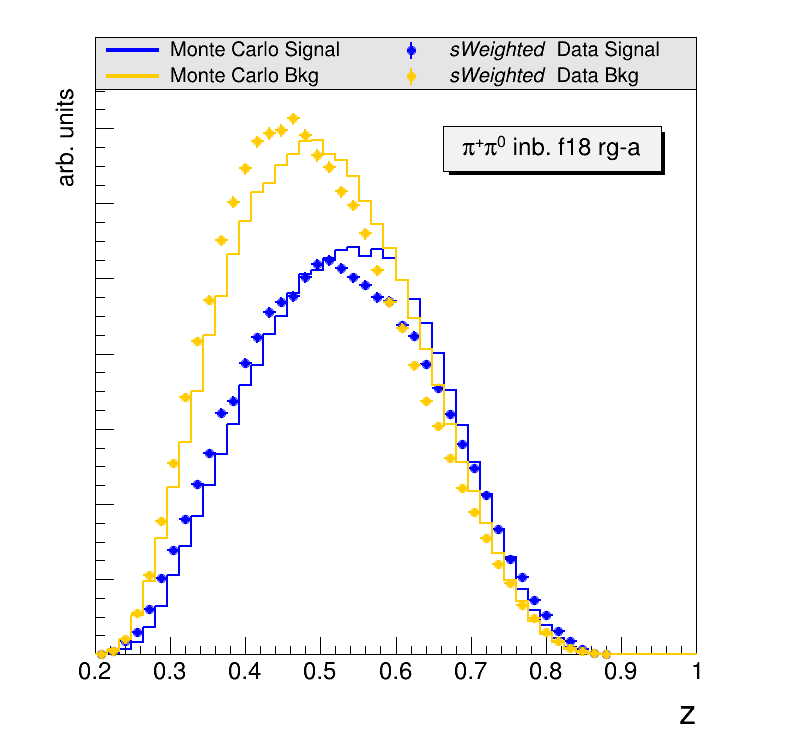

In [19]:
c=gen_canvas_w_data(draw_statement="z",
             xmin=0.2,
             xmax=1,
             xbins=50,
             x_label="z",
             y_label="Counts")
c.Draw()

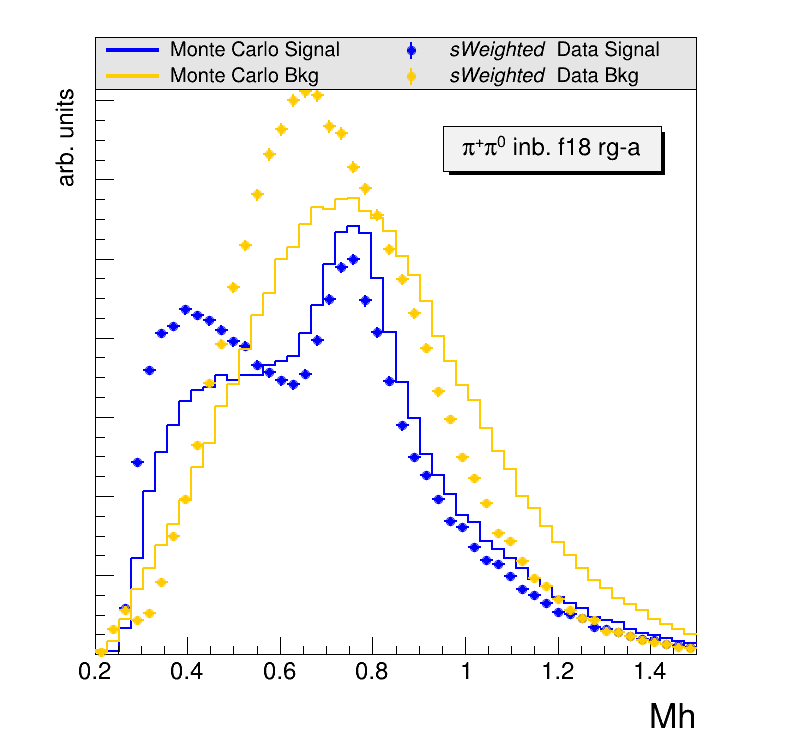

In [20]:
c=gen_canvas_w_data(draw_statement="Mh",
             xmin=0.2,
             xmax=1.5,
             xbins=50,
             x_label="Mh",
             y_label="Counts")
c.Draw()